In [1]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.signal as sig
import os
import matplotlib.ticker as tick
import scipy.optimize as opt
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["font.family"] = "serif"
mp.rcParams["text.usetex"] = True
mp.rcParams["font.size"] = 12

In [20]:
def f_cutoff(R, C):
    return 1/2/np.pi/R/C

def H(R1, R2):
    return 1 + R1/R2

def TransferSallenKeyLowPass(s, H, R1, R2, C1, C2):
    num = H/(R1*R2*C1*C2)
    den = s**2 + s*((1/R1 + 1/R2)/C1 + (1-H)/(R2*C2)) + 1/(R1*R2*C1*C2)
    return num/den

def TransferSallenKeyHighPass(s, H, R1, R2, C1, C2):
    num = H*s**2
    den = s**2 + s*((C2/R2 + C1/R2 + (1-H)*C2/R1)/(C1*C2)) + 1/(R1*R2*C1*C2)
    return num/den

def BodeFitLow(s, a, b, c, d):
    return a/(b*s**2 + c*s + d)

def BodeFitHigh(s, a, b, c, d):
    return a*s**2/(b*s**2 + c*s + d)

In [21]:
R = 1
C = 22e-6
f_cutoff(R, C)*2*np.pi

45454.545454545456

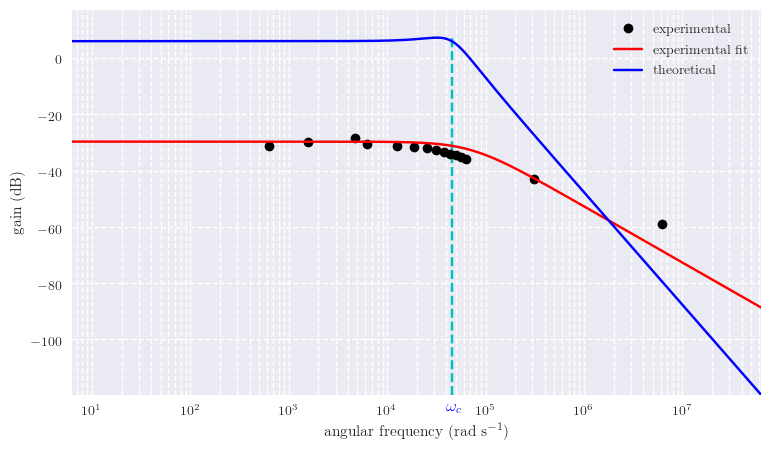

H = 0.032770
R1 = 0.000001
R2 = 0.001578
C1 = 0.000001
C2 = 0.008925


In [33]:
f, Vout = np.genfromtxt("sallenLP.txt", skip_header=1).T
s = np.logspace(0, 7, 500, base=10)
w = 2*np.pi*s
A = 20*np.log10(abs(TransferSallenKeyLowPass(1j*w, H(R, R), R, R, C, C)))

popt, pcov = opt.curve_fit(TransferSallenKeyLowPass, 2*np.pi*f, Vout/5, bounds=(1e-6, np.inf))
Afit = 20*np.log10(abs(TransferSallenKeyLowPass(1j*w, *popt)))

mp.plot(2*np.pi*f, 20*np.log10(Vout/5), "ko", label="experimental")
mp.plot(w, Afit, "r-", label="experimental fit")
mp.plot(w, A, "b", label="theoretical")
mp.vlines(f_cutoff(R,C)*2*np.pi, A.min(), A.max(), color="c", linestyle="--")

mp.xscale("log")
mp.xlabel("angular frequency (rad s$^{-1}$)")
mp.ylabel("gain (dB)")
mp.grid(True, which="both", linestyle="--")
mp.xlim(w.min(), w.max())
mp.ylim(A.min(), A.max()+10)
mp.legend()
mp.text(f_cutoff(R,C)*2*np.pi - 6e3, -126, r"$\omega_c$", color="b")

# mp.savefig("SKLP.png", dpi=300, bbox_inches="tight")
mp.show()

for i,p in enumerate(["H","R1","R2","C1", "C2"]):
    print("%s = %f" %(p, popt[i]))

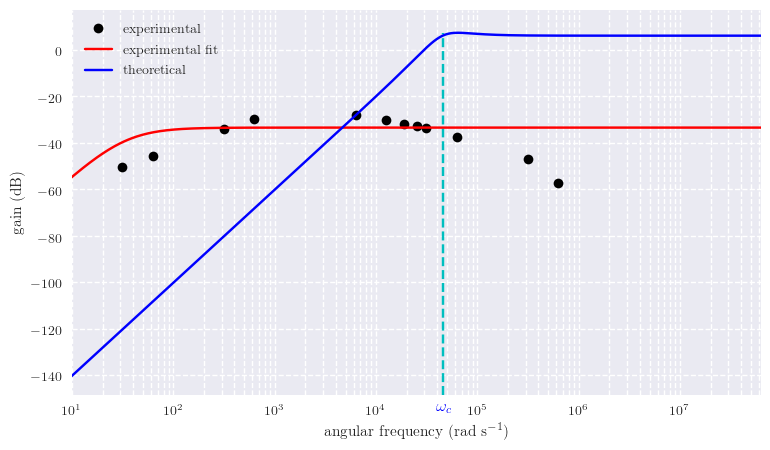

H = 0.021079
R1 = 0.025228
R2 = 1.215714
C1 = 1.211121
C2 = 0.025610


In [15]:
f, Vout = np.genfromtxt("sallenHP.txt", skip_header=1).T
A = 20*np.log10(abs(TransferSallenKeyHighPass(1j*w, H(R, R), R, R, C, C)))

popt, pcov = opt.curve_fit(TransferSallenKeyHighPass, 2*np.pi*f, Vout/5, bounds=(1e-6, np.inf))
Afit = 20*np.log10(abs(TransferSallenKeyHighPass(1j*w, *popt)))

mp.plot(2*np.pi*f, 20*np.log10(Vout/5), "ko", label="experimental")
mp.plot(w, Afit, "r-", label="experimental fit")
mp.plot(w, A, "b-", label="theoretical")
mp.vlines(f_cutoff(R,C)*2*np.pi, A.min(), A.max(), "c", linestyle="--")

mp.xscale("log")
mp.xlabel("angular frequency (rad s$^{-1}$)")
mp.ylabel("gain (dB)")
mp.grid(which="both", axis="x", linestyle="--")
mp.grid(axis="y", which="major", linestyle="--")
mp.xlim(1e1, w.max())
mp.ylim(A.min(), A.max()+10)
mp.text(f_cutoff(R,C)*2*np.pi - 6e3, -156, r"$\omega_c$", color="b")
mp.legend()

# mp.savefig("SKHP.png", dpi=300, bbox_inches="tight")
mp.show()

for i,p in enumerate(["H","R1","R2", "C1", "C2"]):
    print("%s = %f" %(p, popt[i]))

In [34]:
def f_cutoff(R, C):
    return 1/2/np.pi/R/C

def H(R3, R4):
    return 1 + R4/R3

def TransferMultipleLow(s, H, R1, C2, R3, R4, C5):
    num = -H/(R1*R3*C2*C5)
    den = s**2 + s/C2*(1/R1 + 1/R3 + 1/R4) + 1/(R3*R4*C2*C5)
    return num/den

def TransferMultipleHigh(s, H, C1, R2, C3, C4, R5):
    num = -s**2 * C1/C4
    den = s**2 + s*((C1+C3+C4)/C3/C4/R5) + 1/R2/R5/C3/C4
    return num/den

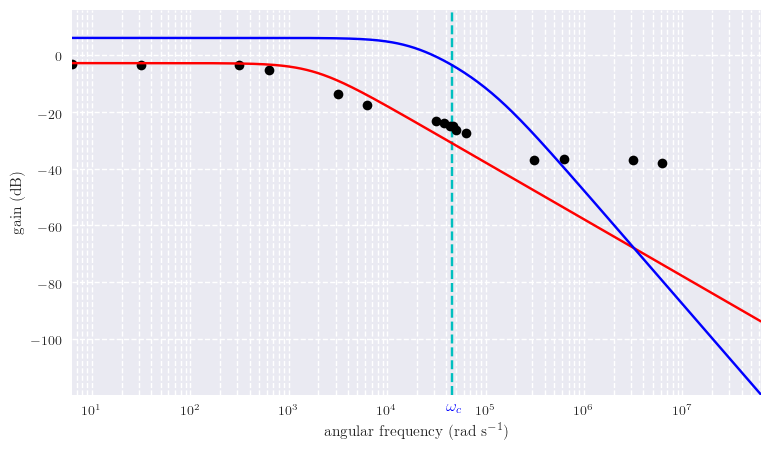

a = 13883454.761427
b = 0.000001
c = 10862.509177
d = 19291161.217962


In [35]:
f, Vout = np.genfromtxt("MFlow.txt", skip_header=1).T
A = 20*np.log10(abs(TransferMultipleLow(1j*w, H(R, R), R, C, R, R, C)))

popt, pcov = opt.curve_fit(BodeFitLow, 2*np.pi*f, Vout/5, bounds=(1e-6, np.inf))
Afit = 20*np.log10(abs(BodeFitLow(1j*w, *popt)))

mp.plot(2*np.pi*f, 20*np.log10(Vout/5), "ko", label="experimental")
mp.plot(w, Afit, "r-", label="experimental fit")
mp.plot(w, A, "b-", label="theoretical")
mp.vlines(f_cutoff(R, C)*2*np.pi, A.min(), A.max()+10, "c", linestyle="--")

mp.xscale("log")
mp.xlabel("angular frequency (rad s$^{-1}$)")
mp.ylabel("gain (dB)")
mp.grid(which="both", axis="x", linestyle="--")
mp.grid(axis="y", which="major", linestyle="--")
mp.xlim(w.min(), w.max())
mp.ylim(A.min(), A.max()+10)
mp.text(f_cutoff(R,C)*2*np.pi - 6e3, -126, r"$\omega_c$", color="b")

# mp.savefig("MFLP.png", dpi=300, bbox_inches="tight")
mp.show()

for i,p in enumerate(["a","b","c", "d"]):
    print("%s = %f" %(p, popt[i]))

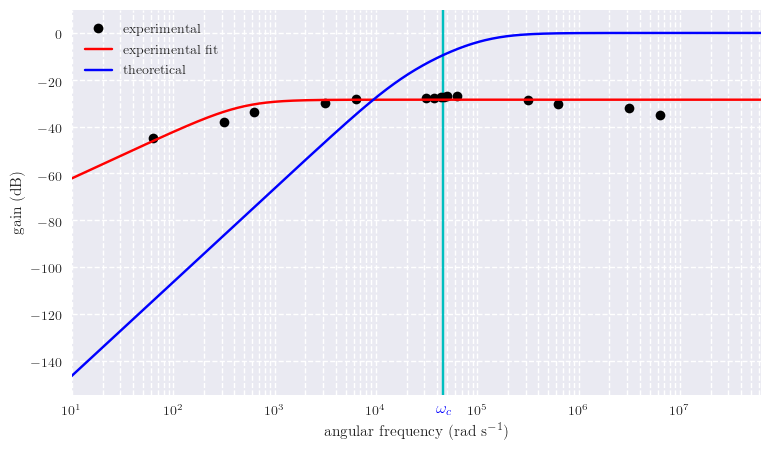

a = 0.257319
b = 6.842885
c = 3254.666371
d = 0.116023


In [39]:
f, Vout = np.genfromtxt("MFhigh.txt", skip_header=1).T
A = 20*np.log10(abs(TransferMultipleHigh(1j*w, H(R, R), C, R, C, C, R)))

popt, pcov = opt.curve_fit(BodeFitHigh, 2*np.pi*f, Vout/5, bounds=(1e-6, np.inf))
Afit = 20*np.log10(abs(BodeFitHigh(1j*w, *popt)))

mp.plot(2*np.pi*f, 20*np.log10(Vout/5), "ko", label="experimental")
mp.plot(w, Afit, "r-", label="experimental fit")
mp.plot(w, A, "b-", label="theoretical")
mp.vlines(f_cutoff(R, C)*2*np.pi, A.min(), A.max()+10, "c")

mp.xscale("log")
mp.xlabel("angular frequency (rad s$^{-1}$)")
mp.ylabel("gain (dB)")
mp.grid(which="both", linestyle="--")
mp.xlim(1e1, w.max())
mp.ylim(A.min(), A.max()+10)
mp.text(f_cutoff(R,C)*2*np.pi - 6e3, -163, r"$\omega_c$", color="b")
mp.legend()

# mp.savefig("MFHP.png", dpi=300, bbox_inches="tight")
mp.show()

for i,p in enumerate(["a","b","c", "d"]):
    print("%s = %f" %(p, popt[i]))

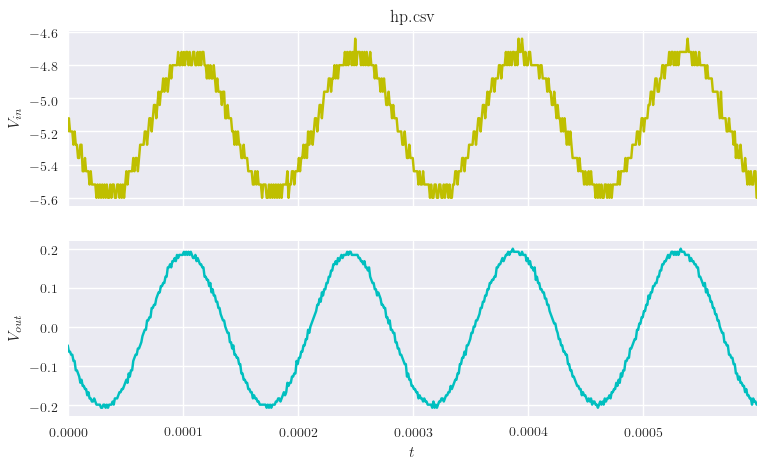

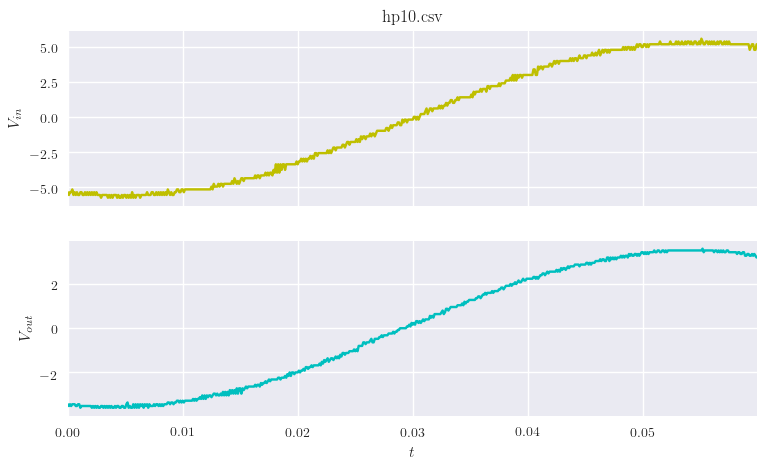

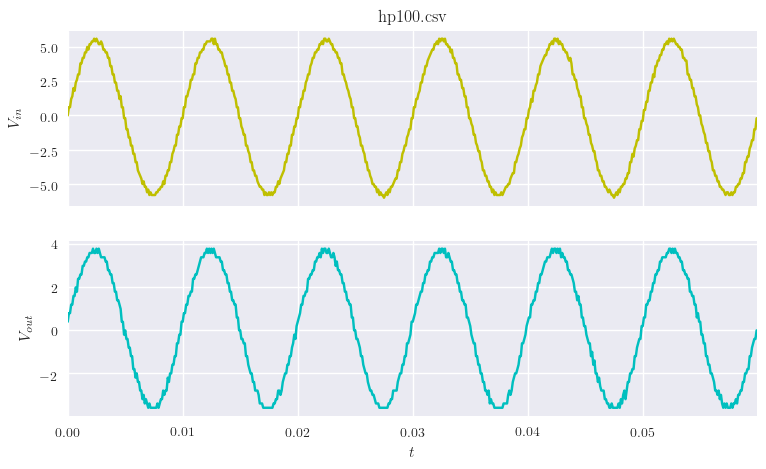

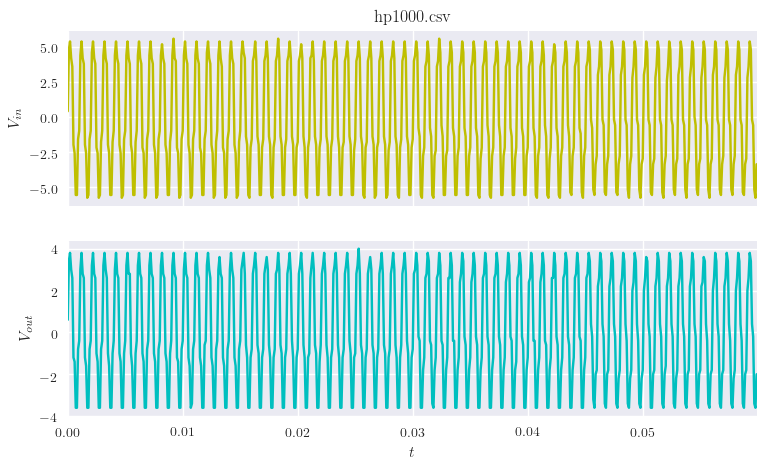

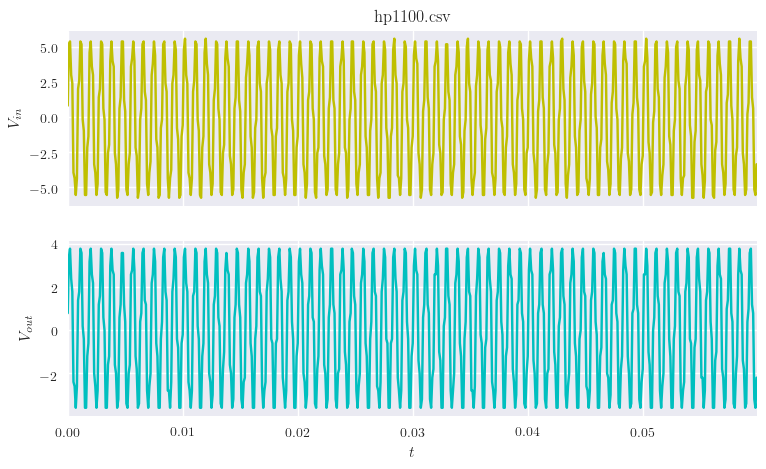

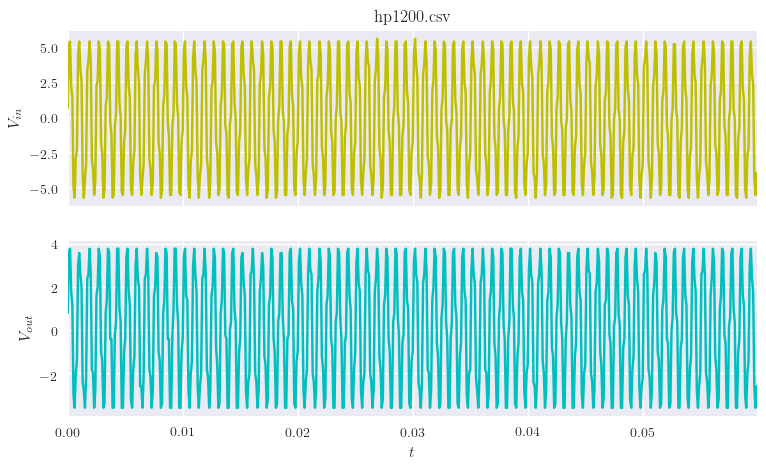

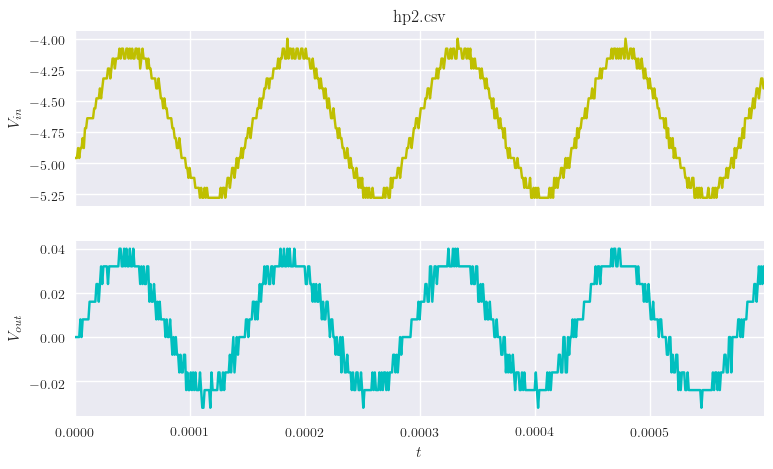

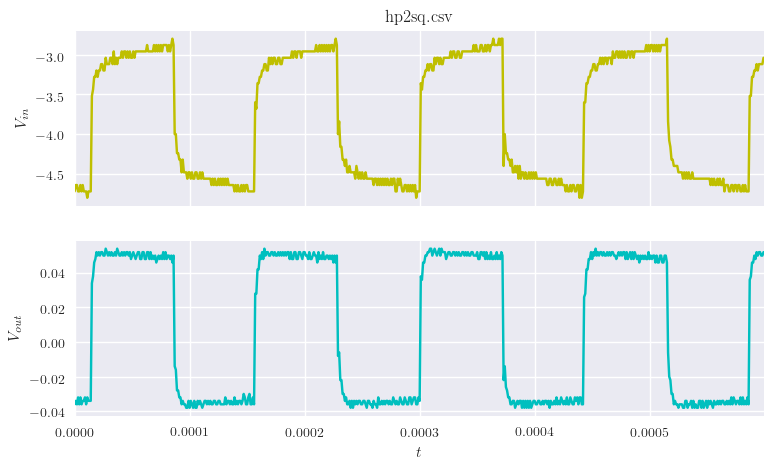

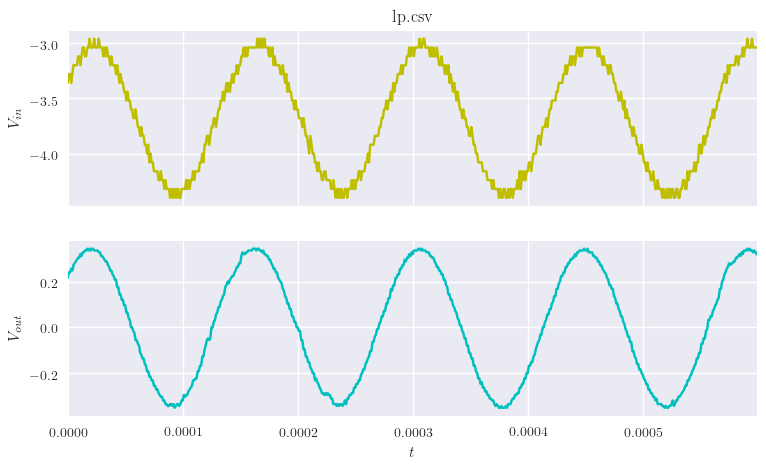

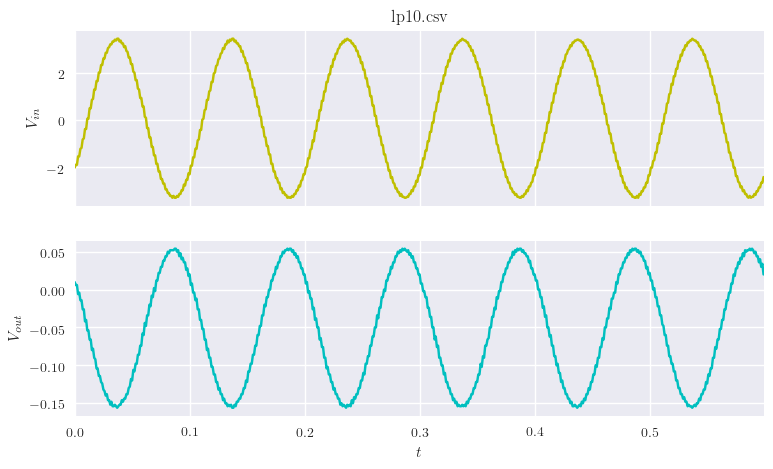

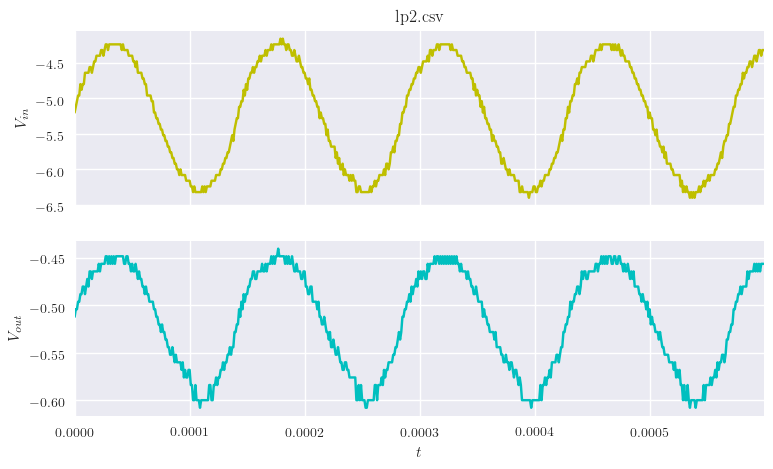

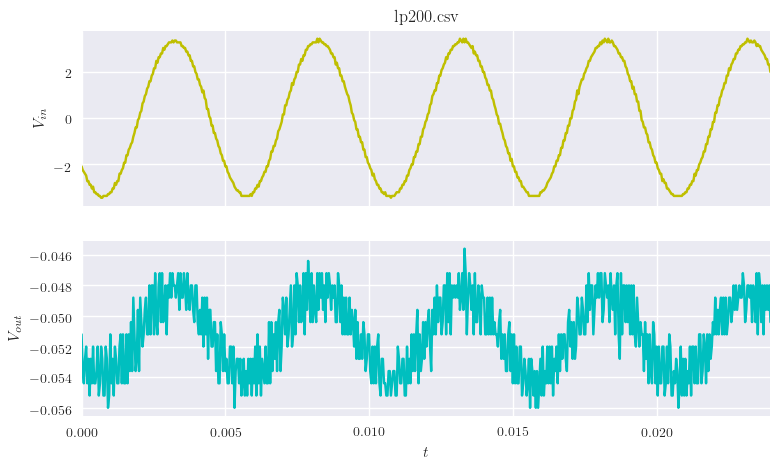

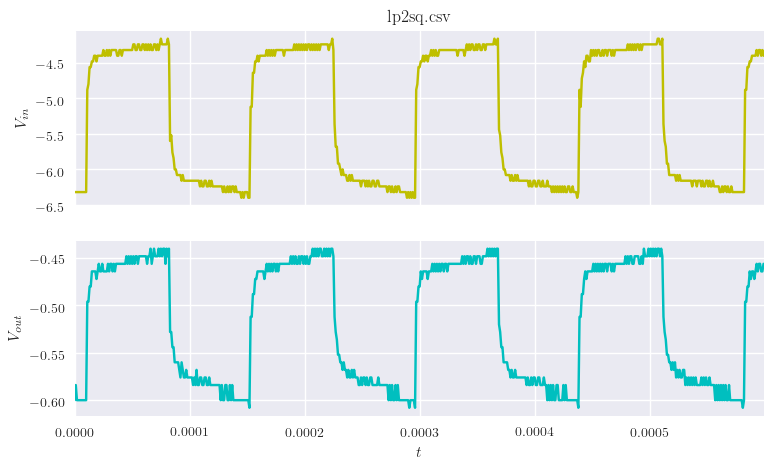

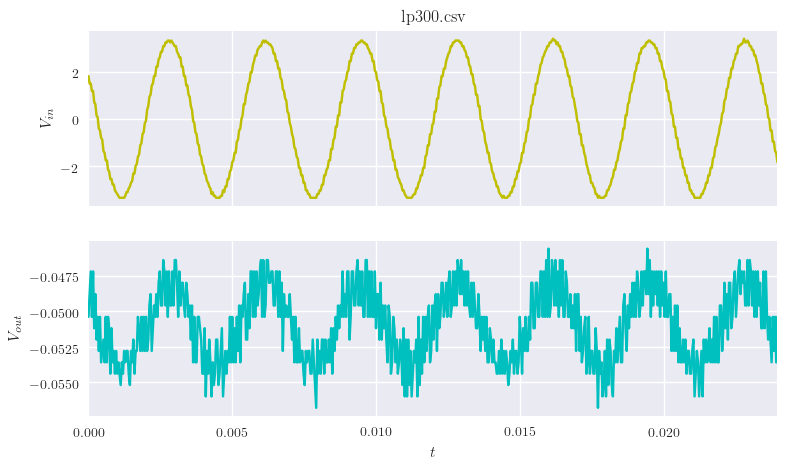

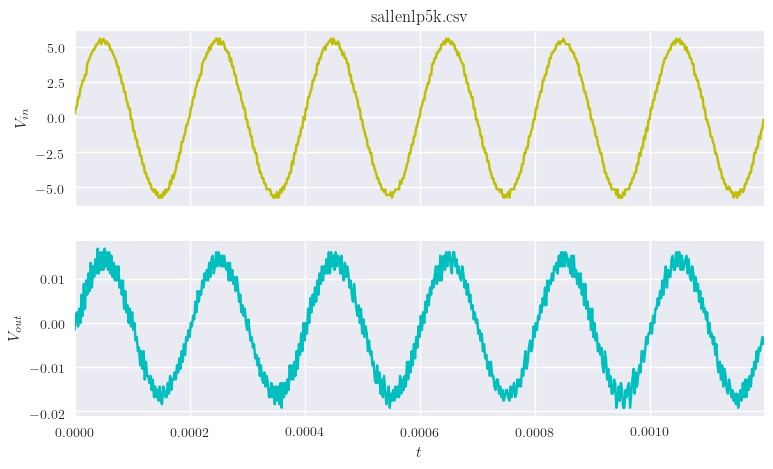

In [293]:
for _, __, files in os.walk("."):
    for file in files:
        if file.endswith(".csv"):
            t, Vin, Vout = np.genfromtxt(file, delimiter=",", skip_header=2, usecols=range(3), unpack=True)
            t += abs(t.min())
            fig = mp.figure()
            ax = fig.add_subplot(212)
            mp.plot(t, Vout, "c-", label=r"$V_{out}$")
            ax.grid(True)
            ax.set_ylabel(r"$V_{out}$")
            ax.set_xlabel(r"$t$")
            ax.set_xlim(t.min(), t.max())
            
            ax = fig.add_subplot(211)
            ax.plot(t, Vin, "y-", label=r"$V_{in}$")
            ax.grid(True)
            ax.set_ylabel(r"$V_{in}$")
            ax.set_title(file)
            ax.xaxis.set_major_formatter(tick.NullFormatter())
            ax.set_xlim(t.min(), t.max())
#             mp.savefig(file[:-4] + ".png", dpi=300, bbox_inches="tight")
            mp.show()